In [3]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df = pd.read_csv('Datasetok.csv',encoding= 'latin-1', sep=";")

In [5]:
#Lectura del Dataset
df.head()

,Cuenta,Cliente,Localidad,Partido,Región,Medidor,Viviendas,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,4706234997,1_DE_MAYO,Tortuguitas,Malvinas_Argentinas,Región_3,199685-490,179,44900,41450,37050,37540,62500,88440,86870,86520,67280,50340,39480,39260
1,9435851244,9_DE_JULIO,Jose_C_Paz,Jose_C_Paz,Región_3,4495128-562,643,5004,4294,4766,5326,8559,12906,13949,13040,9172,6138,5863,6531
2,6766855234,9_DE_JULIO,Jose_C_Paz,Jose_C_Paz,Región_3,4495127-562,643,6564,5659,5014,4705,6849,10855,12439,12214,8067,5379,5007,5349
3,4951709577,ABASCAL,Jose_C_Paz,Jose_C_Paz,Región_3,18996254-560,176,15220,14324,17524,17137,26496,35808,38542,38588,27515,21920,19442,19470
4,4304787167,AGUSTONI,Del_Viso,Pilar,Región_3,4495138-562,286,10230,9514,8633,9629,15565,19895,21914,20312,16071,15250,11943,11817


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Cuenta      209 non-null    int64 
 1   Cliente     209 non-null    object
 2   Localidad   209 non-null    object
 3   Partido     209 non-null    object
 4   Región      209 non-null    object
 5   Medidor     209 non-null    object
 6   Viviendas   209 non-null    int64 
 7   Enero       209 non-null    int64 
 8   Febrero     209 non-null    int64 
 9   Marzo       209 non-null    int64 
 10  Abril       209 non-null    int64 
 11  Mayo        209 non-null    int64 
 12  Junio       209 non-null    int64 
 13  Julio       209 non-null    int64 
 14  Agosto      209 non-null    int64 
 15  Septiembre  209 non-null    int64 
 16  Octubre     209 non-null    int64 
 17  Noviembre   209 non-null    int64 
 18  Diciembre   209 non-null    int64 
dtypes: int64(14), object(5)
memory usage: 31.1+ KB


In [7]:
#Detallamos Shape
df.shape

(209, 19)

In [8]:
#Mostramos cual es la totalidad de registros por columna
df.count()

Cuenta        209
Cliente       209
Localidad     209
Partido       209
Región        209
Medidor       209
Viviendas     209
Enero         209
Febrero       209
Marzo         209
Abril         209
Mayo          209
Junio         209
Julio         209
Agosto        209
Septiembre    209
Octubre       209
Noviembre     209
Diciembre     209
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


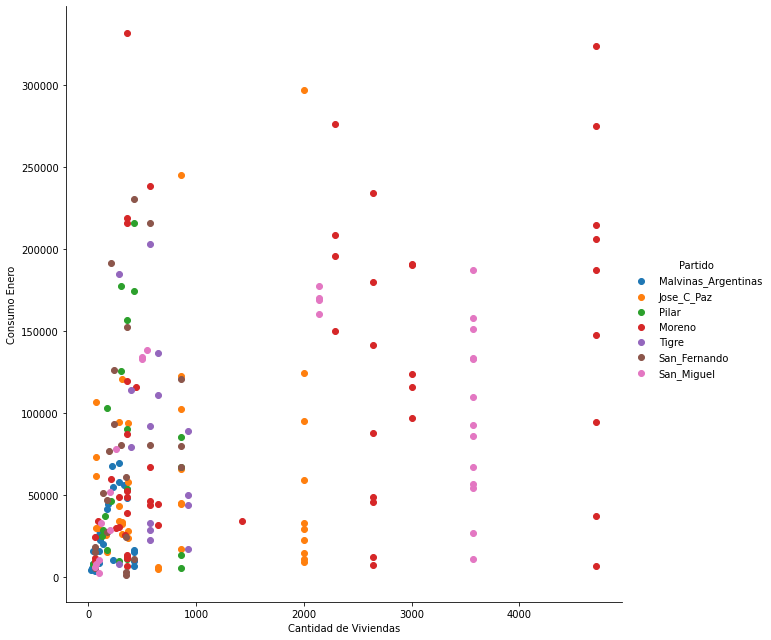

In [9]:
#Consumos en Enero, según cantidad de viviendas en cada municipio
sns.FacetGrid(df,hue = 'Partido' , size = 9).map(plt.scatter,'Viviendas','Enero').add_legend();
plt.xlabel('Cantidad de Viviendas')
plt.ylabel('Consumo Enero')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


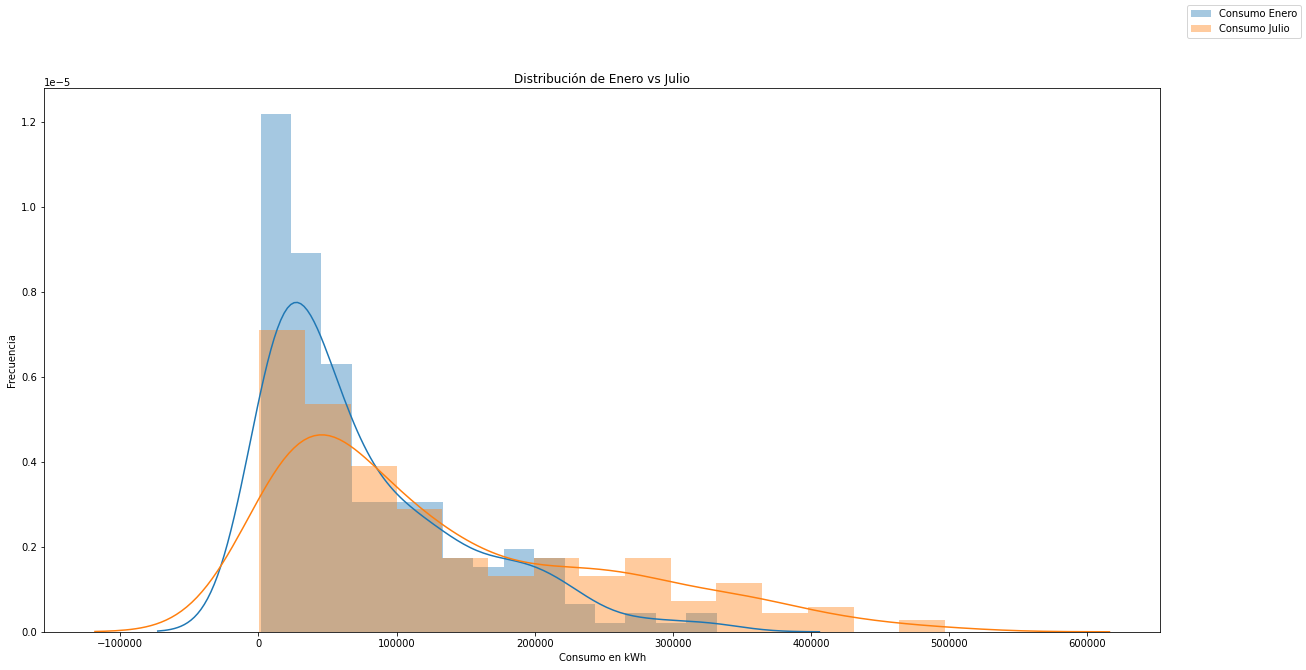

In [10]:
#Hago una comparación entre Enero y Julio, meses de mayor consumo eléctrico en estaciones "extremo"(Verano e Invierno). Me faltaría escalar los valores por debajo
##de 100.000 para que sean más notorias las frecuencias. Esto me demuestra una tendencia clara del "No uso" de energía eléctrica para calefaccionar

fig = plt.figure(figsize=(20,10))

sns.distplot(df.Enero, kde=True, hist=True, bins=15, label='Consumo Enero')

sns.distplot(df.Julio, kde=True, hist=True, bins=15, label='Consumo Julio')


fig.legend()
plt.xlabel('Consumo en kWh')
plt.ylabel('Frecuencia')
plt.title('Distribución de Enero vs Julio')

plt.show()

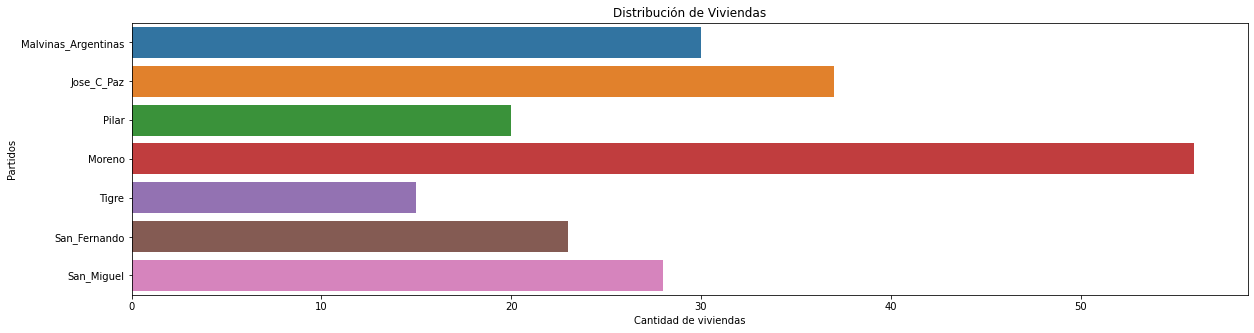

In [11]:
#Vuelvo a aplicar ejemplo utilizado en el workshop para categorizar y demostar gráficamente la cantidad de viviendas por municipio
plt.figure(figsize=(20,5))
sns.countplot(y='Partido',data=df)
plt.xlabel('Cantidad de viviendas')
plt.ylabel('Partidos')
plt.title('Distribución de Viviendas')
plt.show()

In [12]:
import plotly.express as px

In [13]:
#Distribución de consumos de Enero por cada localidad de forma interactiva
fig = px.scatter(df, x="Localidad", y="Enero")
fig.show()

In [14]:
#Reaplico el caso anterior, pero agrupando Partidos y aplicando efecto de símbolo para su diferenciación gráfica
fig = px.scatter(df, x="Partido", y="Julio", color="Localidad",symbol='Localidad')
fig.show()

In [15]:
#Al caso anterior, le aplico un histrograma, para ver de mejor manera el "peso" que tiene cada municipio en los consumos de octubre.
##Para llevarlo a la práctica, me permite redistribuir equipos según la necesidad real de cada partido.
fig = px.scatter(df, x="Partido", y="Octubre", marginal_x="histogram", marginal_y="rug")
fig.show()